# K Nearest Neighbors Project 

We've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

## Import Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['patch.force_edgecolor'] = True

## Get the Data
** Reading the 'KNN_Project_Data csv file into a dataframe **

In [4]:
df=pd.read_csv('KNN_Project_Data')

**Checking the head of the dataframe.**

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Exploratory Data Analysis

Since this data is classified, the information regrading the column variables are not provided. So any exploratry data anlysis wouldn't give much information. But we'll just do a large pairplot with seaborn.

**A pairplot with the hue indicated by the TARGET CLASS column is created.**

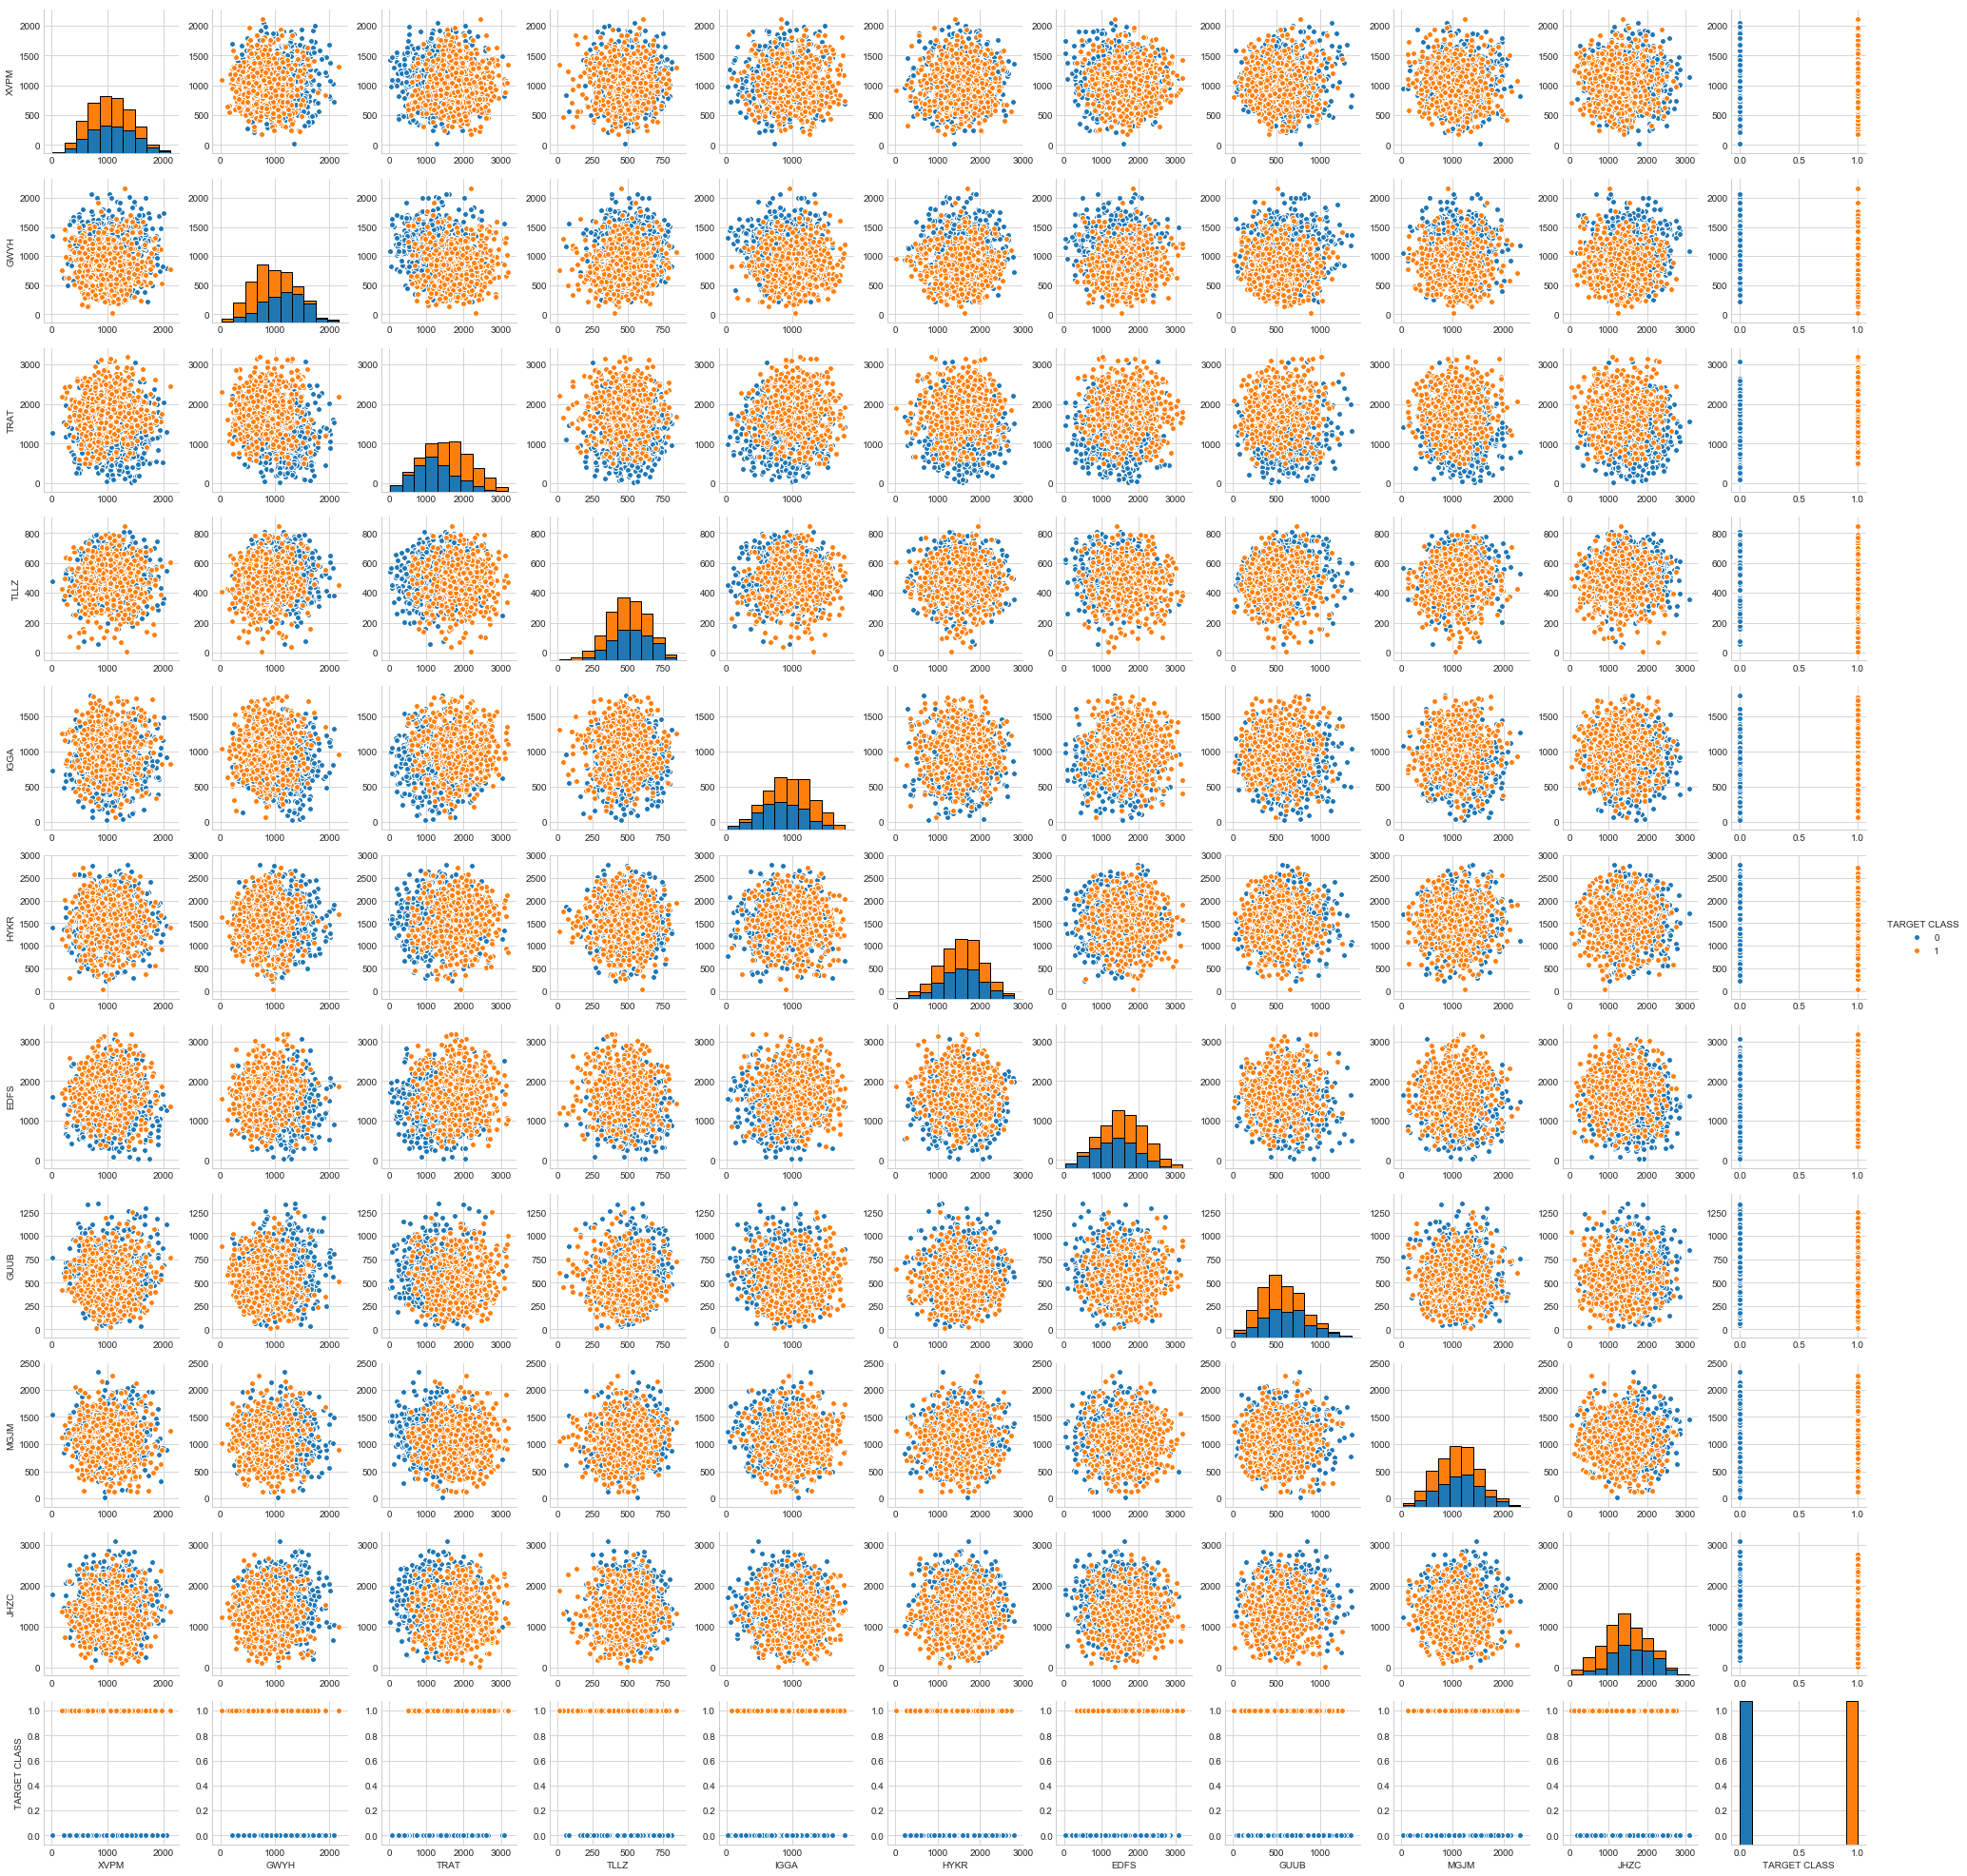

In [4]:
sns.pairplot(df, hue = 'TARGET CLASS')

# Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scalar = StandardScaler()

In [7]:
scalar.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scalar.transform(df.drop('TARGET CLASS',axis=1))

**Converting the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [9]:
df_feat=pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [10]:
X=df_feat
y=df['TARGET CLASS']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# Using KNN


We are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knnmodel=KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [18]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [19]:
prediction = knnmodel.predict(X_test)

** Create a confusion matrix and classification report.**

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
print(confusion_matrix(y_test,prediction))

[[105  35]
 [ 36 124]]


In [24]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.74      0.75      0.75       140
          1       0.78      0.78      0.78       160

avg / total       0.76      0.76      0.76       300



It looks like the model did a reasonable job at predicting the output. We can imporve the model's performance by altering the K value.

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!



In [26]:
error_rate = []
for i in range(1,30):
    knnmodel=KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(X_train,y_train)
    p = knnmodel.predict(X_test)
    error_rate.append(np.mean(abs(y_test-p)))

**Plotting the error_rate against the corresponding K Value to determine the optimum one.**

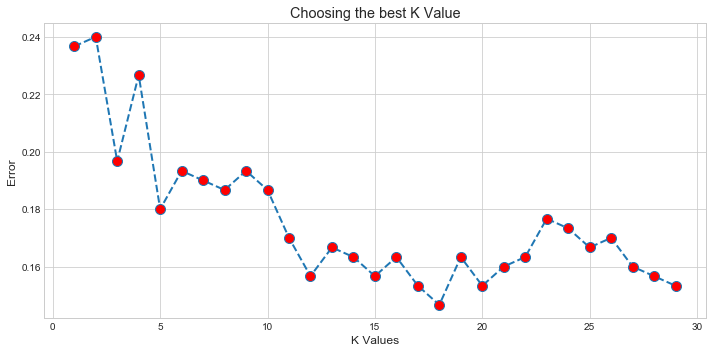

In [27]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30), error_rate, linewidth=2, linestyle='--', markersize=10, marker='o', markerfacecolor='red')
plt.xlabel('K Values', fontsize = 'large')
plt.ylabel('Error', fontsize = 'large')
plt.title('Choosing the best K Value', fontsize = 'x-large')
plt.tight_layout()

The error for a K value of 18 is about 0.145, and that all the other value seem to produce a larger error.

## Retrain with new K Value

**Retraining the model with the best K value and re-creating the classification report and the confusion matrix.**

In [28]:
knnmodel=KNeighborsClassifier(n_neighbors=18)
knnmodel.fit(X_train, y_train)
prediction = knnmodel.predict(X_test)

In [29]:
print(confusion_matrix(y_test,prediction))

[[123  17]
 [ 27 133]]


In [30]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       140
          1       0.89      0.83      0.86       160

avg / total       0.86      0.85      0.85       300



We see a better performance out of our model by tuning to a better K value. This is now looking much better than the model we had initialy generated with a K value of 1.